# **Topic 3.2: Advanced Probabilistic Models**

## Implementing a Markov Decision Process (MDP)

---
**Step-by-Step Instructions**


1. Set Up Environment

---


In [ ]:
# Install required libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the grid environment parameters
grid_size = 5
start_state = (0, 0)
goal_state = (4, 4)
penalty_states = [(2, 2), (3, 3)]

# Rewards for different states
reward_goal = 10
reward_penalty = -10
reward_step = -1

# Define actions and their effects
actions = ["U", "D", "L", "R"]
action_effects = {
    "U": (-1, 0),  # Up
    "D": (1, 0),   # Down
    "L": (0, -1),  # Left
    "R": (0, 1)    # Right
}

# Transition probabilities
transition_probabilities = {
    "intended": 0.8,
    "left": 0.1,
    "right": 0.1
}

2. Define the MDP

---


In [ ]:
def is_valid(state):
    """Check if the state is within grid boundaries."""
    x, y = state
    return 0 <= x < grid_size and 0 <= y < grid_size

def get_next_state(state, action):
    """Get the next state after taking an action."""
    dx, dy = action_effects[action]
    next_state = (state[0] + dx, state[1] + dy)
    return next_state if is_valid(next_state) else state

def get_reward(state):
    """Return the reward for a given state."""
    if state == goal_state:
        return reward_goal
    if state in penalty_states:
        return reward_penalty
    return reward_step

3. Implement Value Iteration

---


In [ ]:
def value_iteration(discount_factor=0.9, theta=1e-4):
    """Perform Value Iteration to find the optimal policy."""
    # Initialize value function and policy
    V = np.zeros((grid_size, grid_size))
    policy = np.full((grid_size, grid_size), '', dtype=object)

    while True:
        delta = 0  # Maximum change in value function
        new_V = np.copy(V)

        for x in range(grid_size):
            for y in range(grid_size):
                state = (x, y)
                if state == goal_state:
                    continue  # Skip goal state

                action_values = []
                for action in actions:
                    value = 0
                    for prob_type, prob in transition_probabilities.items():
                        if prob_type == "intended":
                            next_action = action
                        elif prob_type == "left":
                            next_action = actions[(actions.index(action) - 1) % 4]
                        elif prob_type == "right":
                            next_action = actions[(actions.index(action) + 1) % 4]

                        next_state = get_next_state(state, next_action)
                        value += prob * (get_reward(next_state) + discount_factor * V[next_state])
                    action_values.append(value)

                # Update value function and policy
                best_action_value = max(action_values)
                new_V[state] = best_action_value
                policy[state] = actions[np.argmax(action_values)]
                delta = max(delta, abs(new_V[state] - V[state]))

        V = new_V
        if delta < theta:  # Convergence condition
            break

    return V, policy


4. Run Value Iteration

---


In [ ]:
# Run the Value Iteration algorithm
optimal_values, optimal_policy = value_iteration()

# Display the results
print("Optimal Value Function:")
print(optimal_values)

print("\nOptimal Policy:")
for row in optimal_policy:
    print(row)

Optimal Value Function:
[[-3.69041572 -2.81400612 -1.7063552  -0.41597141  1.0764551 ]
 [-2.81400612 -1.98954293 -0.67081883  0.91919839  2.80141652]
 [-1.7063552  -0.67081883  0.19087519  1.82171427  5.03029156]
 [-0.41597141  0.91919839  1.82171427  4.94211829  7.79751667]
 [ 1.0764551   2.80141652  5.03029156  7.79751667  0.        ]]

Optimal Policy:
['D' 'R' 'R' 'R' 'D']
['D' 'D' 'R' 'R' 'D']
['D' 'D' 'D' 'R' 'D']
['D' 'D' 'D' 'D' 'D']
['R' 'R' 'R' 'R' '']


5. Visualize

---


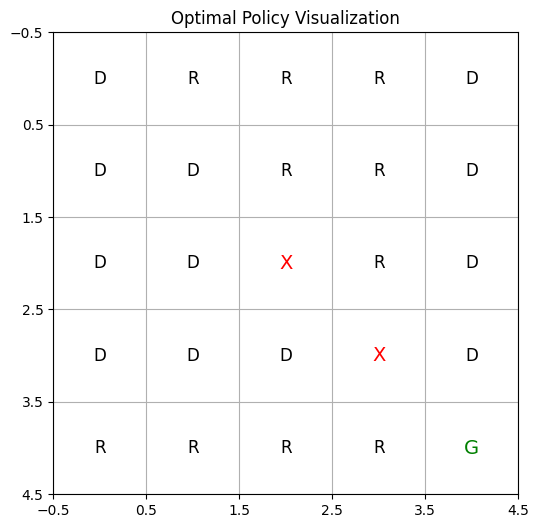

In [ ]:
def plot_policy(policy):
    """Visualize the optimal policy."""
    fig, ax = plt.subplots(figsize=(6, 6))
    for x in range(grid_size):
        for y in range(grid_size):
            if (x, y) == goal_state:
                ax.text(y, x, "G", ha='center', va='center', color='green', fontsize=14)
            elif (x, y) in penalty_states:
                ax.text(y, x, "X", ha='center', va='center', color='red', fontsize=14)
            else:
                ax.text(y, x, policy[(x, y)], ha='center', va='center', fontsize=12)

    ax.set_xticks(np.arange(-0.5, grid_size, 1))
    ax.set_yticks(np.arange(-0.5, grid_size, 1))
    ax.grid(True)
    ax.set_xlim(-0.5, grid_size - 0.5)
    ax.set_ylim(-0.5, grid_size - 0.5)
    plt.gca().invert_yaxis()
    plt.title("Optimal Policy Visualization")
    plt.show()

plot_policy(optimal_policy)